In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv(r"..\input\train.csv")
test_df = pd.read_csv(r"..\input\test.csv")

test_df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [18]:
#Get the dummy variables for all features.
# 1 : Numerical : Fill with the mean values
# 2:  Categorical : 1) Replace NA with None, as NA has some meaning. 
#                      Like NA for parking will mean No parking and may effect SaleCost
#Rest all delete the rows

def clean_data(df):
    df['MasVnrType'].fillna("NoNe",inplace=True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
    df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(),inplace=True)
    df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(),inplace=True)
    df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(),inplace=True)
    df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean(),inplace=True)
    df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean(),inplace=True)
    df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
    df['Alley'].fillna("NoNe",inplace=True)
    df['FireplaceQu'].fillna("NoNe",inplace=True)
    df['GarageType'].fillna("NoNe",inplace=True)
    df['GarageYrBlt'].fillna("NoNe",inplace=True)
    df['GarageFinish'].fillna("NoNe",inplace=True)
    df['GarageQual'].fillna("NoNe",inplace=True)
    df['GarageCond'].fillna("NoNe",inplace=True)
    df['PoolQC'].fillna("NoNe",inplace=True)
    df['Fence'].fillna("NoNe",inplace=True)
    df['MiscFeature'].fillna("NoNe",inplace=True)
    df['GarageCars'].fillna(df['GarageCars'].mean(),inplace=True)
    df['GarageArea'].fillna(df['GarageArea'].mean(),inplace=True)
    #For rest of he variables we will drop the data
    df.dropna(axis=0,inplace=True)
    return df
def clean_data_test(df):
    df['MasVnrType'].fillna("NoNe",inplace=True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
    df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(),inplace=True)
    df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(),inplace=True)
    df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(),inplace=True)
    df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean(),inplace=True)
    df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean(),inplace=True)
    df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
    df['Alley'].fillna("NoNe",inplace=True)
    df['FireplaceQu'].fillna("NoNe",inplace=True)
    df['GarageType'].fillna("NoNe",inplace=True)
    df['GarageYrBlt'].fillna("NoNe",inplace=True)
    df['GarageFinish'].fillna("NoNe",inplace=True)
    df['GarageQual'].fillna("NoNe",inplace=True)
    df['GarageCond'].fillna("NoNe",inplace=True)
    df['PoolQC'].fillna("NoNe",inplace=True)
    df['Fence'].fillna("NoNe",inplace=True)
    df['MiscFeature'].fillna("NoNe",inplace=True)
    df['GarageCars'].fillna(df['GarageCars'].mean(),inplace=True)
    df['GarageArea'].fillna(df['GarageArea'].mean(),inplace=True)
    df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(),inplace=True)
    
    return df
    
def get_dummies(df):
    df = pd.get_dummies(df)
    return df

In [19]:
df = clean_data(df)
test_df = clean_data_test(test_df)
print(df.shape)
print(test_df.shape)

(1420, 81)
(1459, 80)


In [20]:
#convert the categorical variable by adding dummies
df = get_dummies(df)
test_df = get_dummies(test_df)

#Test to see if both the test & train data and same columns
print(test_df.shape)

df['SalePrice'] = np.log(df['SalePrice'])

print(df.shape)


(1459, 378)
(1420, 393)


In [21]:
#Since we have now figure out that train has more columns then test, 
#we can safely assume that no significant feature of the training set will be missing from test set.
#Else we need to get the test database updated.

#Now find the significant features, for the SalePrice
#Will Get the Pearson Correlation with Saleprice with below thresholds


pthreshhold = 0.3
nthreshhold = -0.3

def get_significant_features(df,feature='SalePrice'):
    Corr = pd.DataFrame(df.corr()[feature])
    Corr = Corr[(Corr >  pthreshhold) | (Corr <  nthreshhold ) ]
    #Drop all the not significant values.
    Corr = Corr.dropna()
    return Corr


In [22]:
train_corr = get_significant_features(df,'SalePrice')
train_corr.index



Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_NridgHt', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA', 'CentralAir_N',
       'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA',
       'FireplaceQu_Gd', 'FireplaceQu_NoNe', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_NoNe', 'GarageYrBlt_NoNe',
       'GarageFinish_Fin', 'GarageFinish_NoNe', 'GarageFinish_Unf',
       'GarageQual_NoNe', 'GarageQual_TA', 'GarageCond_

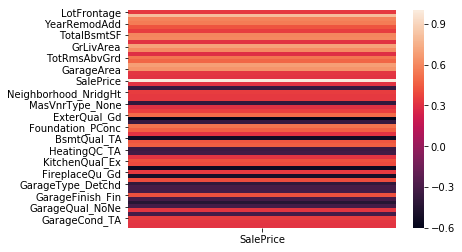

In [23]:
sn.heatmap(train_corr)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


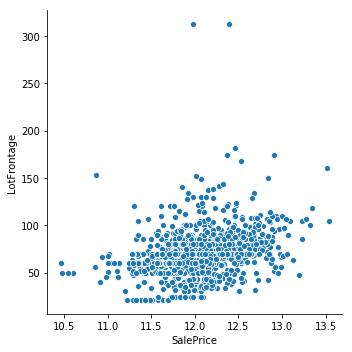

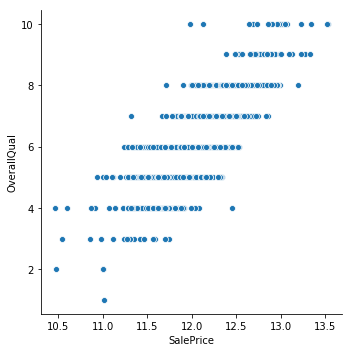

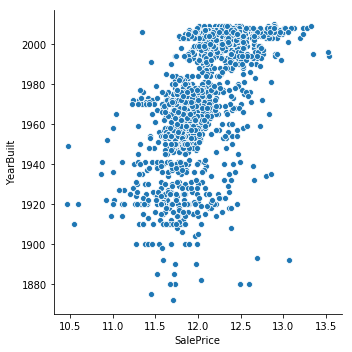

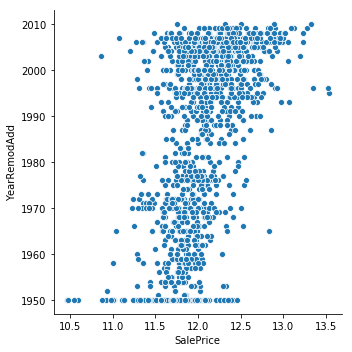

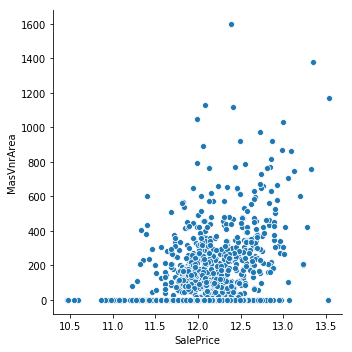

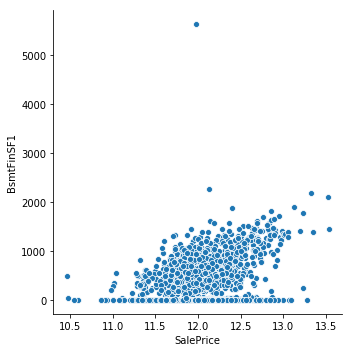

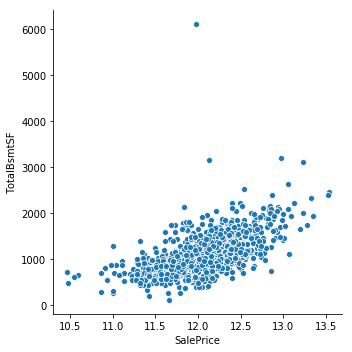

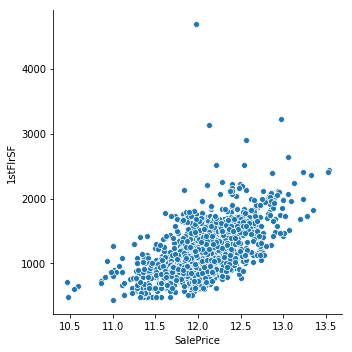

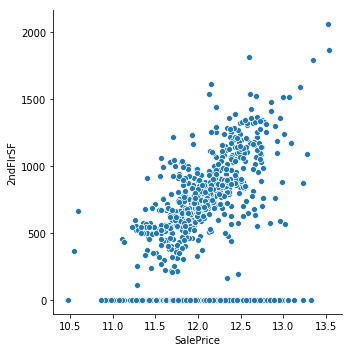

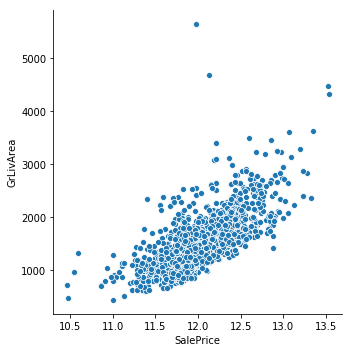

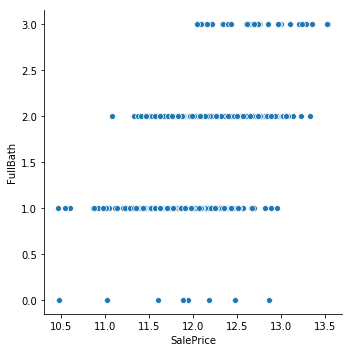

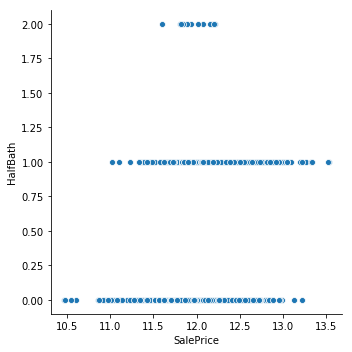

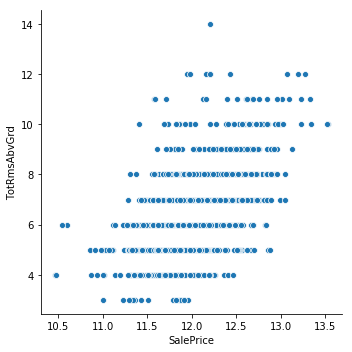

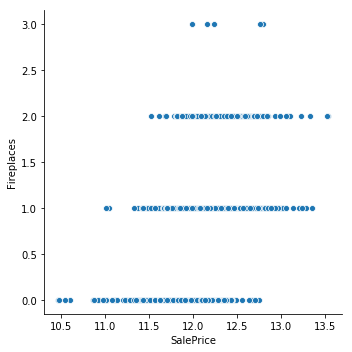

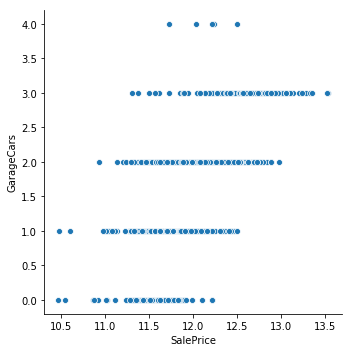

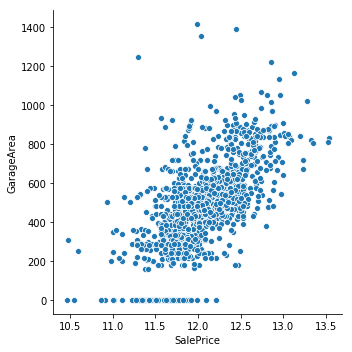

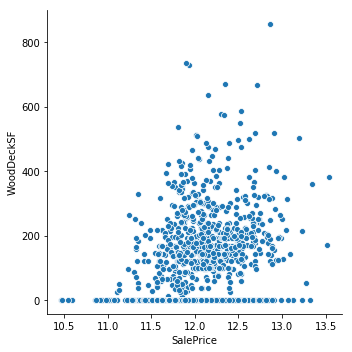

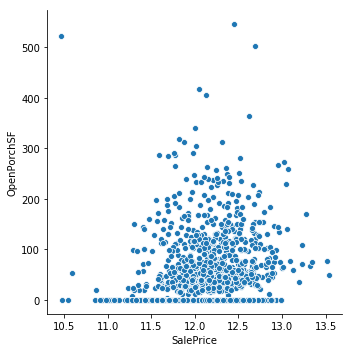

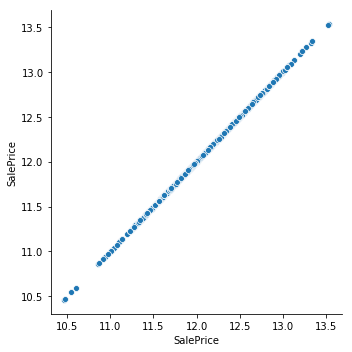

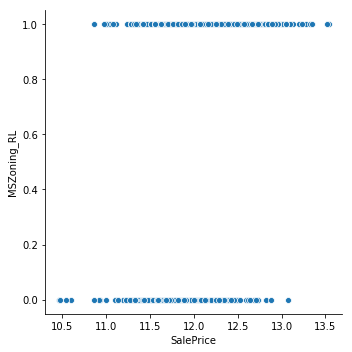

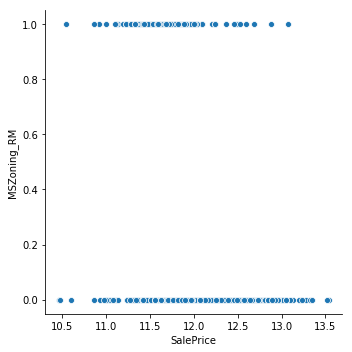

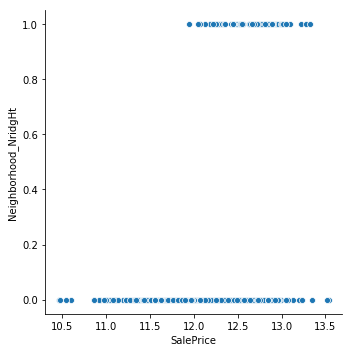

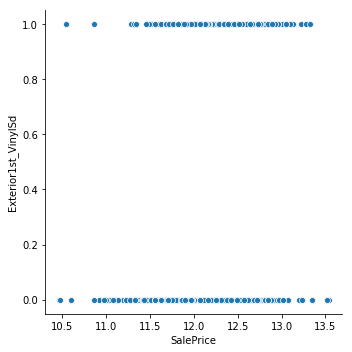

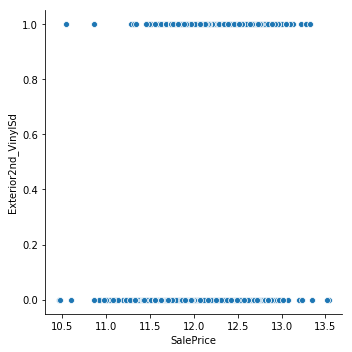

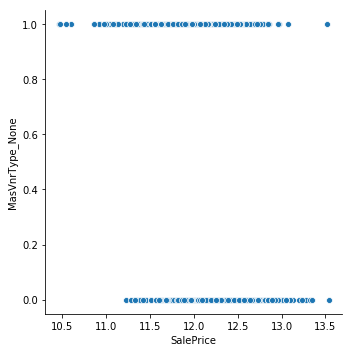

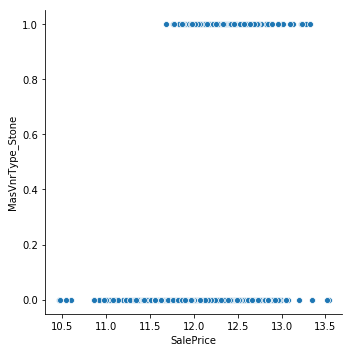

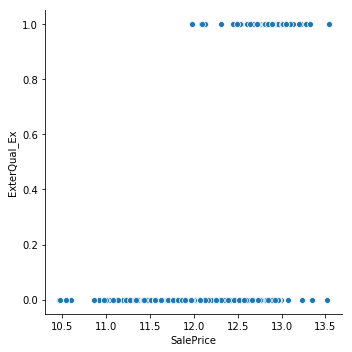

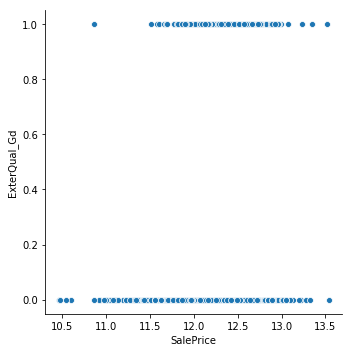

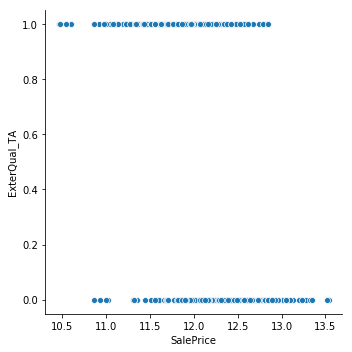

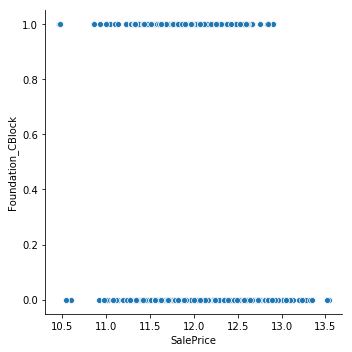

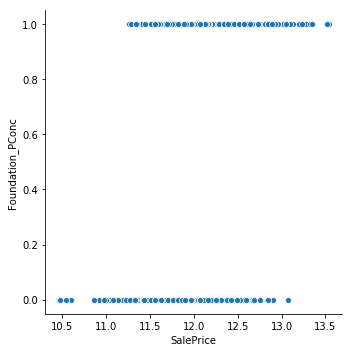

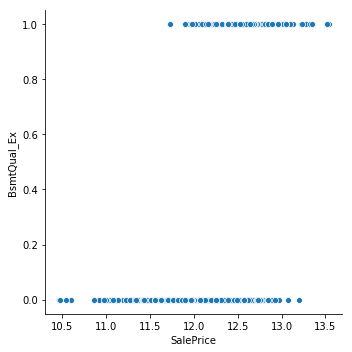

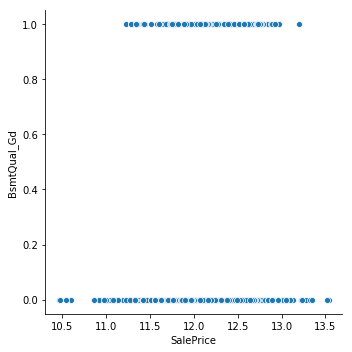

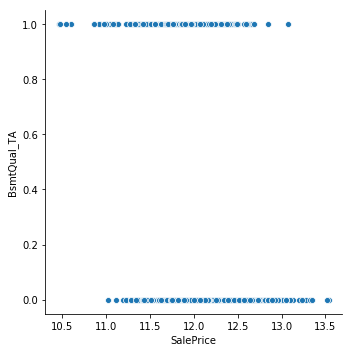

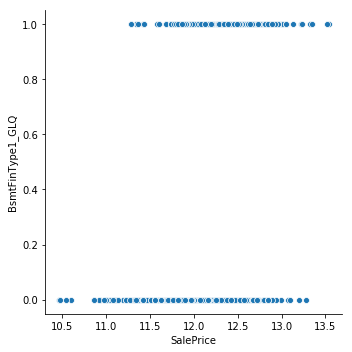

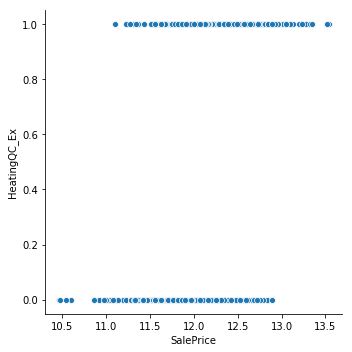

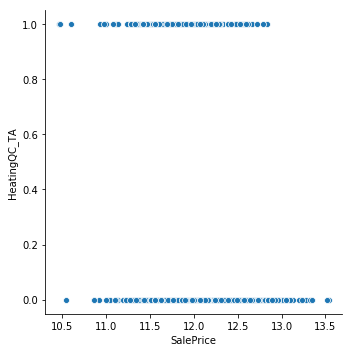

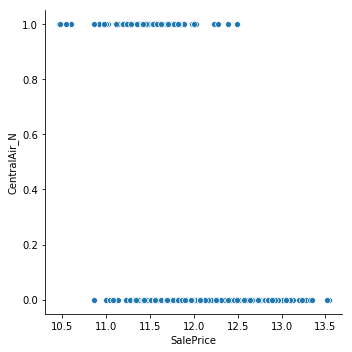

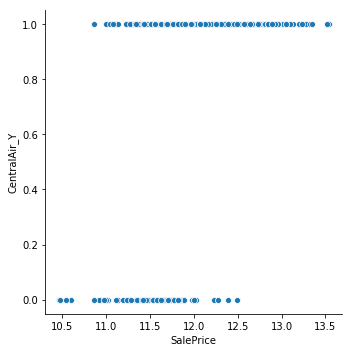

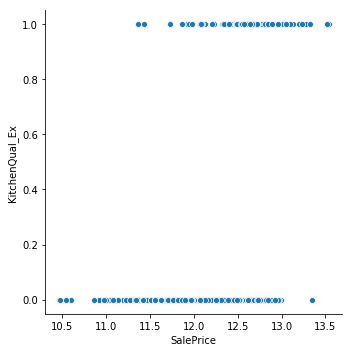

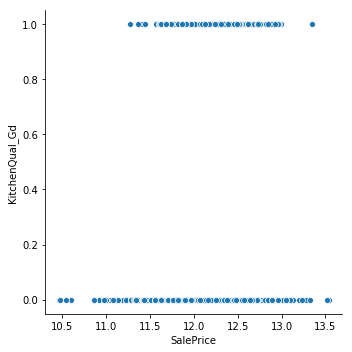

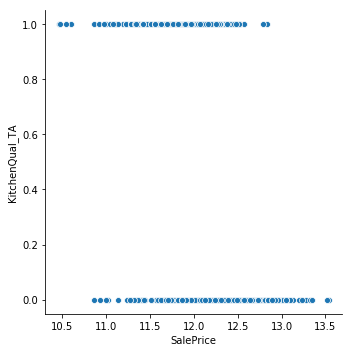

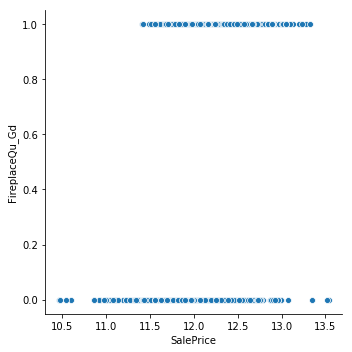

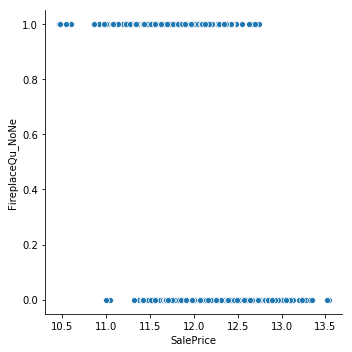

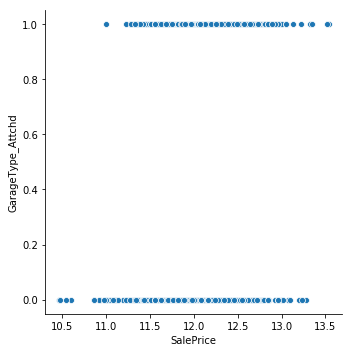

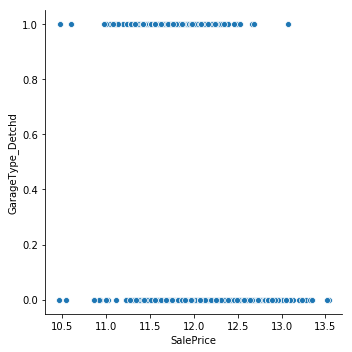

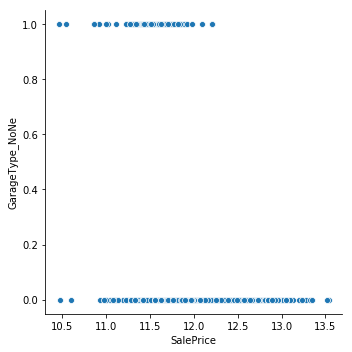

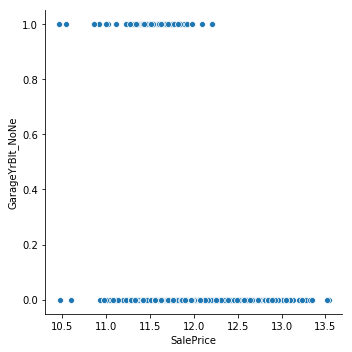

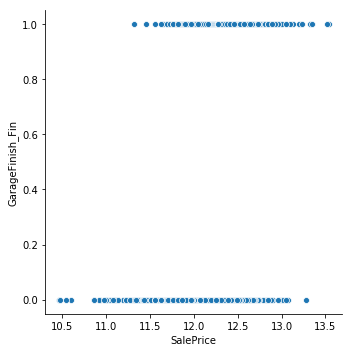

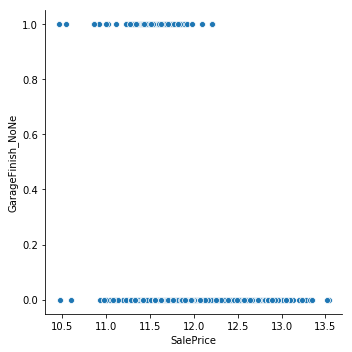

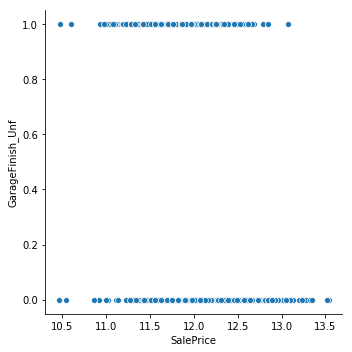

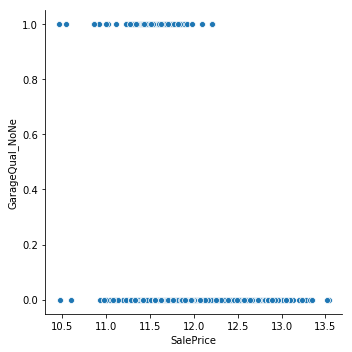

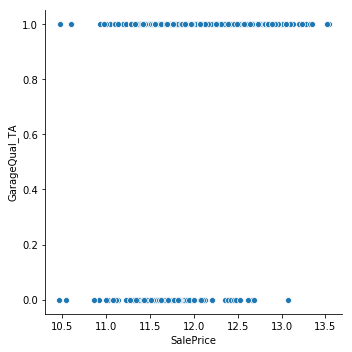

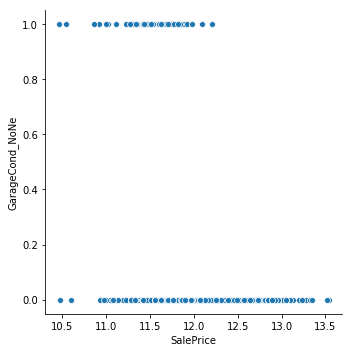

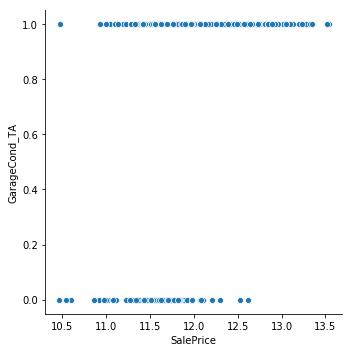

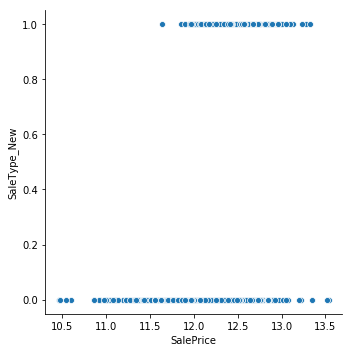

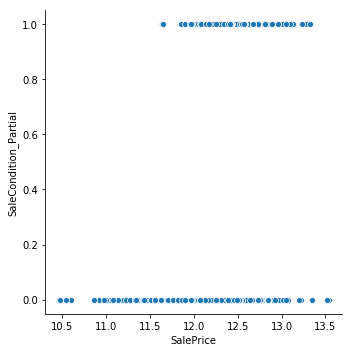

In [24]:
for val in train_corr.index:
    sn.relplot(x='SalePrice',y=val,data=df)

In [25]:
train_corr = train_corr.drop('SalePrice',axis=0)
train_corr.head()

,SalePrice
LotFrontage,0.338641
OverallQual,0.810763
YearBuilt,0.585307
YearRemodAdd,0.557840
MasVnrArea,0.427026


In [26]:
def get_rmse(true_val,pred_val):
    error = true_val-pred_val
    rmse = np.sqrt(np.mean(error**2))
    return rmse

In [27]:
#Now Run the Ridge Regularization
from  sklearn.linear_model  import Ridge
def reg_alpha(X,Y,alpha,normalize=True):
    lreg = Ridge(alpha)
    model = lreg.fit(X,Y)
    Y_pred = model.predict(X)
    return model,Y_pred,lreg

In [28]:
#Now lets move the Regression on the significant features
#Now lets start the regression model
#Extract the rigth set of features from df
X = df[train_corr.index]
X = sm.add_constant(X)
Y = df['SalePrice']
train_corr.index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd',
       'FireplaceQu_NoNe', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_NoNe', 'GarageYrBlt_NoNe', 'GarageFinish_Fin',
       'GarageFinish_NoNe', 'GarageFinish_Unf', 'GarageQual_NoNe',
       'GarageQual_TA', 'GarageCond_NoNe', 'Garag

In [29]:
output = []
alpha = [100,10,1,0.1,0.01,0.001,0.0001]
count=0
for alpha_val in alpha:
    X = sm.add_constant(X)
    model,Y_pred_alpha,lreg = reg_alpha(X,Y,alpha_val)
    rmse = get_rmse(Y,Y_pred_alpha)
    score = model.score(X,Y)
    output.append((alpha_val,rmse,score))
    count+= 1

output_df = pd.DataFrame(output,columns=['alpha','rmse','score'])
output_df  


,alpha,rmse,score
0,100.0000,0.150805,0.853378
1,10.0000,0.148772,0.857304
2,1.0000,0.148528,0.857773
3,0.1000,0.148516,0.857795
4,0.0100,0.148516,0.857795
5,0.0010,0.148516,0.857795
6,0.0001,0.148516,0.857795


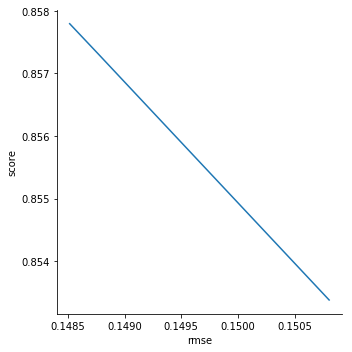

In [30]:
sn.relplot(x='rmse',y='score',kind="line",data=output_df)

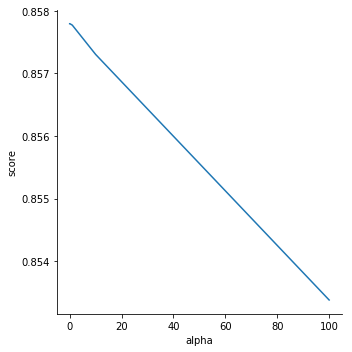

In [70]:
sn.relplot(x='alpha',y='score',kind="line",data=output_df)

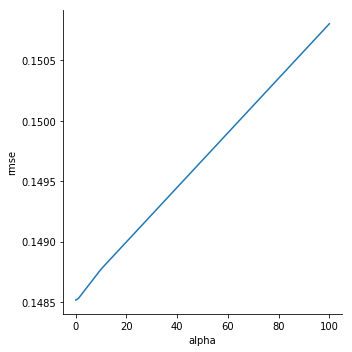

In [71]:
sn.relplot(x='alpha',y='rmse',kind="line",data=output_df)

In [67]:
#Let's keep alpha as 0.1 as rest of the results are not realistic

alpha = 0.1
X = df[train_corr.index]
X = sm.add_constant(X)

model,Y_pred_alpha_train,lreg = reg_alpha(X,Y,alpha_val)

In [68]:
X_test = test_df[train_corr.index]
X_test.isna().sum()

LotFrontage              0
OverallQual              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
GrLivArea                0
FullBath                 0
HalfBath                 0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
MSZoning_RL              0
MSZoning_RM              0
Neighborhood_NridgHt     0
Exterior1st_VinylSd      0
Exterior2nd_VinylSd      0
MasVnrType_None          0
MasVnrType_Stone         0
ExterQual_Ex             0
ExterQual_Gd             0
ExterQual_TA             0
Foundation_CBlock        0
Foundation_PConc         0
BsmtQual_Ex              0
BsmtQual_Gd              0
BsmtQual_TA              0
BsmtFinType1_GLQ         0
HeatingQC_Ex             0
HeatingQC_TA             0
CentralAir_N             0
C

In [72]:
#Lets get the test data
X_test = test_df[train_corr.index]
X_test = sm.add_constant(X_test)
Y_pred_alpha_test = model.predict(X_test)
Y_pred_alpha_test

array([11.62331088, 11.91759704, 12.08015351, ..., 12.00837419,
       11.61944738, 12.36615517])

In [73]:
Y_pred_alpha_test = np.exp(Y_pred_alpha_test)

In [74]:
Predict = pd.DataFrame({'Id': test_df.Id, 'SalePrice': (Y_pred_alpha_test)})
Predict.reset_index(drop=True,inplace=True)
Predict.to_csv('submission.csv')


In [75]:
Predict

,Id,SalePrice
0,1461,111670.838093
1,1462,149881.017831
2,1463,176337.227920
3,1464,198564.764083
4,1465,196142.348792
5,1466,175610.781901
6,1467,179426.614523
7,1468,171770.220877
8,1469,190982.400478
9,1470,120185.762665
